<a href="https://colab.research.google.com/github/aschelin/Dengue/blob/master/dados_inmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregando os dados:

In [46]:
data_path = "https://raw.githubusercontent.com/aschelin/Dengue/master/dadosinmettotV2.csv"

In [97]:
df = pd.read_csv(data_path,sep=';',decimal=",")

In [98]:
df

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,07/01/2014,0.0,886.204167,14.312500,28.9,22.816667,16.6,61.416667,34.0,9.6,2.341667
1,08/01/2014,0.0,886.141667,12.508333,28.2,23.004167,15.8,53.500000,29.0,9.2,2.904167
2,09/01/2014,0.0,885.516667,12.625000,28.5,23.395833,17.5,53.125000,28.0,8.6,2.862500
3,10/01/2014,0.0,885.720833,14.158333,28.1,23.345833,17.1,57.125000,40.0,9.7,3.016667
4,11/01/2014,0.0,887.012500,14.754167,29.0,21.795833,16.1,65.916667,32.0,9.3,2.345833
...,...,...,...,...,...,...,...,...,...,...,...
2179,26/12/2019,0.0,887.166667,17.591667,28.6,22.800000,18.7,74.125000,48.0,7.6,1.637500
2180,27/12/2019,0.0,886.966667,17.037500,28.5,23.754167,19.6,67.708333,43.0,9.7,2.945833
2181,28/12/2019,0.2,886.395833,15.387500,29.0,23.879167,19.3,60.458333,32.0,8.9,3.037500
2182,29/12/2019,0.0,885.379167,15.187500,29.8,24.170833,18.4,59.541667,34.0,7.8,2.491667


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Medicao                                            2184 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    2183 non-null   float64
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              2179 non-null   float64
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  2179 non-null   float64
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    2183 non-null   float64
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     2178 non-null   float64
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    2183 non-null   float64
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           2182 non-null   float64
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA 

In [100]:
df['Data Medicao']=pd.to_datetime(df['Data Medicao'])

In [101]:

df.set_index('Data Medicao',inplace=True)

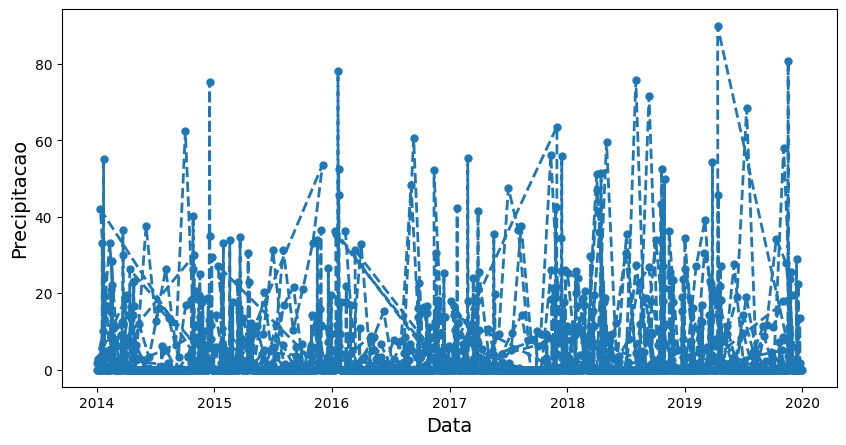

In [59]:

fig, (ax1) = plt.subplots(1,figsize=(10,5),dpi=100)

ax1.plot(df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'],marker='o', linestyle='--',    linewidth=2,markersize=5, color='tab:blue')
#maxi=round(df.Total.max()+100);
ax1.set_ylabel('Precipitacao',fontsize=14);
ax1.set_xlabel('Data',fontsize=14);

In [61]:
corr = df.corr

In [63]:
corr

<bound method DataFrame.corr of               PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  ...  VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)
Data Medicao                                        ...                                           
2014-07-01                                     0.0  ...                                   2.341667
2014-08-01                                     0.0  ...                                   2.904167
2014-09-01                                     0.0  ...                                   2.862500
2014-10-01                                     0.0  ...                                   3.016667
2014-11-01                                     0.0  ...                                   2.345833
...                                            ...  ...                                        ...
2019-12-26                                     0.0  ...                                   1.637500
2019-12-27                                     0.0  ...                      

# Separando o tempo

In [102]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek

# Histogramas dos dados de precipitação:

In [119]:
df.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)':'rain'},inplace=True)

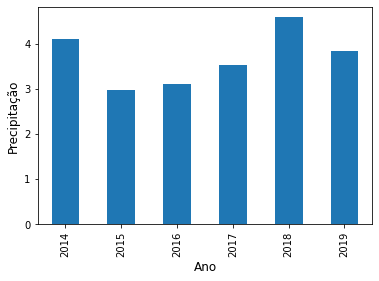

In [120]:
# plotar os valores em função do horário
ax1 = df.groupby('year').rain.mean().plot.bar();
ax1.set_ylabel('Precipitação',fontsize=12);
ax1.set_xlabel('Ano',fontsize=12);

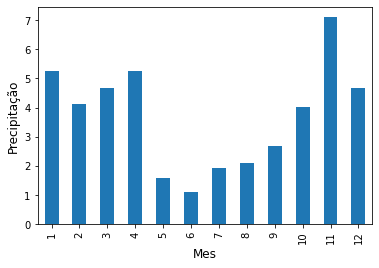

In [121]:
# plotar os valores em função do mes
ax2 = df.groupby('month').rain.mean().plot.bar();
ax2.set_ylabel('Precipitação',fontsize=12);
ax2.set_xlabel('Mes',fontsize=12);

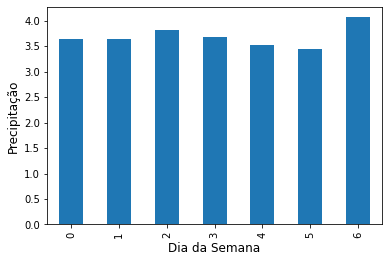

In [122]:
# plotar os valores em função do dia da semana
ax3 = df.groupby('day_of_week').rain.mean().plot.bar();
ax3.set_ylabel('Precipitação',fontsize=12);
ax3.set_xlabel('Dia da Semana',fontsize=12);

# Dados de Vento

In [123]:
df.rename(columns={'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)':'windm'},inplace=True)


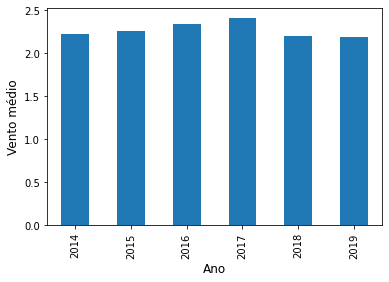

In [124]:
# plotar os valores em função do horário
ax1 = df.groupby('year').windm.mean().plot.bar();
ax1.set_ylabel('Vento médio',fontsize=12);
ax1.set_xlabel('Ano',fontsize=12);

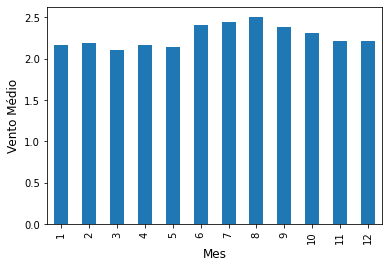

In [125]:
# plotar os valores em função do mes
ax2 = df.groupby('month').windm.mean().plot.bar();
ax2.set_ylabel('Vento Médio',fontsize=12);
ax2.set_xlabel('Mes',fontsize=12);

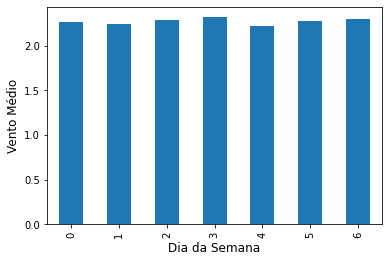

In [126]:
# plotar os valores em função do dia da semana
ax3 = df.groupby('day_of_week').windm.mean().plot.bar();
ax3.set_ylabel('Vento Médio',fontsize=12);
ax3.set_xlabel('Dia da Semana',fontsize=12);

# Dados Temperatura


In [127]:
df.rename(columns={'TEMPERATURA MEDIA, DIARIA (AUT)(°C)':'tempm'},inplace=True)

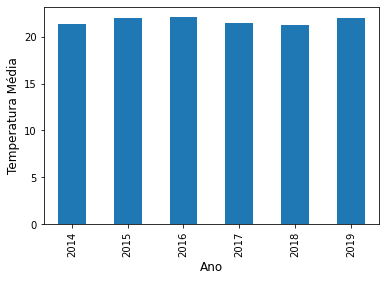

In [128]:
# plotar os valores em função do horário
ax1 = df.groupby('year').tempm.mean().plot.bar();
ax1.set_ylabel('Temperatura Média',fontsize=12);
ax1.set_xlabel('Ano',fontsize=12);

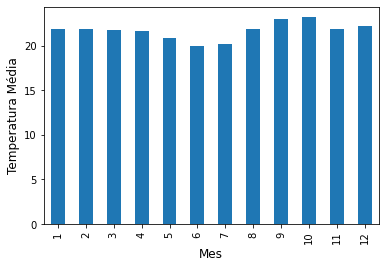

In [129]:
# plotar os valores em função do horário
ax1 = df.groupby('month').tempm.mean().plot.bar();
ax1.set_ylabel('Temperatura Média',fontsize=12);
ax1.set_xlabel('Mes',fontsize=12);

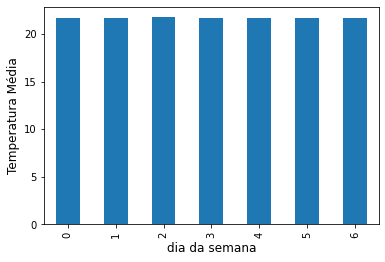

In [130]:
# plotar os valores em função do horário
ax1 = df.groupby('day_of_week').tempm.mean().plot.bar();
ax1.set_ylabel('Temperatura Média',fontsize=12);
ax1.set_xlabel('dia da semana',fontsize=12);

# Dados da temperatura de orvalho

In [103]:
df.rename(columns={'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)':'torvalhom'},inplace=True)


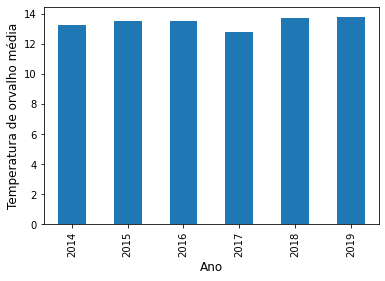

In [113]:
# plotar os valores em função do horário
ax1 = df.groupby('year').torvalhom.mean().plot.bar();
ax1.set_ylabel('Temperatura de orvalho média',fontsize=12);
ax1.set_xlabel('Ano',fontsize=12);

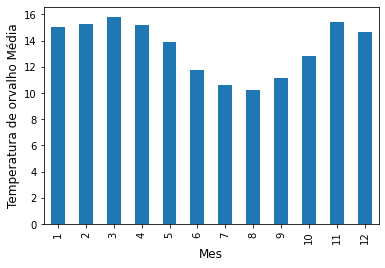

In [112]:
# plotar os valores em função do horário
ax1 = df.groupby('month').torvalhom.mean().plot.bar();
ax1.set_ylabel('Temperatura de orvalho média',fontsize=12);
ax1.set_xlabel('Mes',fontsize=12);

# Dados de Umidade Relativa

In [107]:
df.rename(columns={'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)':'umidaderelmed'},inplace=True)


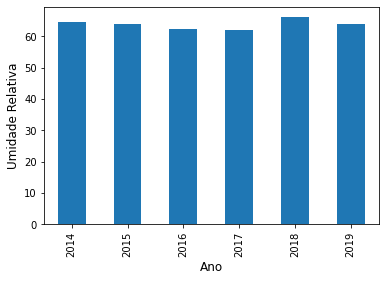

In [114]:
# plotar os valores em função do horário
ax1 = df.groupby('year').umidaderelmed.mean().plot.bar();
ax1.set_ylabel('Umidade Relativa',fontsize=12);
ax1.set_xlabel('Ano',fontsize=12);


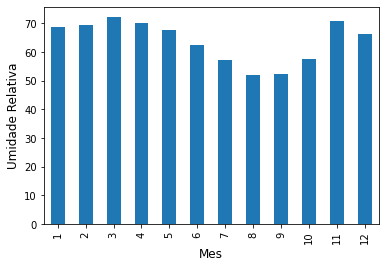

In [116]:
# plotar os valores em função do horário
ax1 = df.groupby('month').umidaderelmed.mean().plot.bar();
ax1.set_ylabel('Umidade Relativa',fontsize=12);
ax1.set_xlabel('Mes',fontsize=12);